# Sistemas de ecuaciones lineales: introducción

**Objetivo general**
- Aplicar el pensamiento computacional para plantear la solución de un problema simple en términos de sistemas de ecuaciones lineales.

**Objetivos particulares**
- Entender como plantear un problema simple en términos de un sistema de ecuaciones lineales.
- Usar funciones de la biblioteca `numpy` para resolver el problema.
- Comparar varios métodos para la solución de problemas más complejos.

## Contenido
- [1 - Planes de telefonía móvil.](#1)
    - [1.1 - Un primer modelo matemático.](#1-1)
        - [Ejercicio 1 - Gráfica de rectas.](#ej-1)
    - [1.2 - Sistema de ecuaciones lineales.](#1-2)
        - [Ejercicio 2. Solución del sistema lineal.](#ej-2)
- [2 - Sistemas de ecuaciones lineales en general.](#2)
- [3 - Transferencia de calor.](#3)
    - [3.1 - Métodos estacionarios para solución de sistemas lineales.](#3-1)
        - [Ejercicio 3. Evaluación de métodos.](#ej-3)

<a name='1'></a>
## Planes de telefonía móvil.

Dos compañías de telefonía compiten por ganar clientes. En la tabla que sigue se muestra el costo de la renta y el costo por Megabyte (MB) de datos de cada compañía.

|    | Renta mensual | Costo por MB |
|:--:|:----: | :----------: |
| A  | $200$ | $0.10$       |
| B  | $20$  | $0.35$       |

**¿Cómo podríamos decidir cuál de estas companías conviene contratar?**

<a name='1-1'></a>
### Un modelo matemático
- Observamos en la tabla anterior que la compañía A tiene un precio fijo de 200 pesos mensuales que es 10 veces mayor al precio que cobra la compañía B (20 pesos). 
- Por otro lado, la compañía B cobra 0.35 pesos por cada MB, que es 3.5 veces mayor al precio por MB de la compañía A. 
- El precio final mensual de cada compañía depende básicamente de cuantos MB se usen. 

Podemos escribir la forma en que cambia el precio de cada compañía en función de los MB usados:

$
\begin{array}{ccc}
P_A & = & 0.10 x + 200 \tag{1}\\
P_B & = & 0.35 x + 20
\end{array}
$

donde $x$ representa el número de MB usados durante un mes. 

<a name='ej-1'></a>
#### **<font color="SlateBlue">Ejercicio 1. Gráfica de rectas.</font>**

<font color="Navy">En el código siguiente complete las fórmulas para cada compañía de acuerdo con las ecuaciones dadas en (1) y posteriormente ejecute el código para obtener una gráfica de cómo cambia el precio en función de los MB utilizados.</font>

In [1]:
%run "./init.ipynb"

In [12]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Fórmulas a implementar:
$
\begin{array}{ccc}
P_A & = & 0.10 x + 200\\
P_B & = & 0.35 x + 20
\end{array}
$

In [13]:
# Megabytes desde 0 hasta 1500 (1.5 GB)
x = np.linspace(0,1500,10)

# Fórmulas de cada compañía
PA = 0.10 * x + 200
PB = 0.35 * x + 20

In [14]:
e.verifica(PA, 1)

¡Tu resultado es correcto!


In [15]:
e.verifica(PB, 2)

¡Tu resultado es correcto!


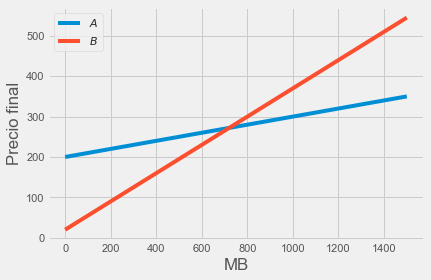

In [17]:
# Gráfica de ambos casos
plt.plot(x, PA, label = '$A$')
plt.plot(x, PB, label = '$B$')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.grid(True)
plt.legend()
plt.show()

**¿Qué observamos en la figura anterior?**

Para decidir cuál de los dos compañías elegir, debemos saber cuantos MB gastamos al mes. En la figura se ve que al principio, con pocos MB usados conviene contratar a la compañía B. Pero después, si hacemos uso intenso de nuestras redes sociales, el consumo de MB aumenta y como consecuencia el precio de la compañía A es más barato.

**¿Será posible determinar con precisión el punto de cruce de las rectas?**


<a name='1-2'></a>
### Sistema de ecuaciones lineales.

Las ecuaciones $(1)$ tienen la forma típica de una recta: $y = m x + b$

Para la compañía A tenemos que $m = 0.10$ y $b = 200$, mientras que para la compañía B tenemos $m = 0.35$ y $b = 20$, entonces escribimos:

$$
\begin{array}{ccc}
y & = & 0.10 x + 200 \\
y & = & 0.35 x + 20
\end{array}
$$

Ahora, es posible escribir las ecuaciones de las líneas rectas en forma de un sistema de ecuaciones lineales como sigue:

$$
\left[
\begin{array}{cc}
0.10 & -1 \\
0.35 & -1
\end{array} \right]
\left[
\begin{array}{c}
x_{0} \\
x_{1}
\end{array} \right] =
\left[
\begin{array}{c}
-200 \\ 
-20
\end{array} \right] \tag{2}
$$

donde hemos renombrado las variables como $x \equiv x_0$ y $y \equiv x_1$. **¿Puede verificar que el sistema (2) es correcto?**

Si resolvemos el sistema (2), entonces será posible conocer de manera precisa el cruce de las rectas.

<a name='ej-2'></a>
#### **<font color="SlateBlue">Ejercicio 2. Solución del sistema lineal.</font>**

---
<font color="Navy">1. En el siguiente código, complete los datos de la matriz `A` y el vector `b`. </font>

---

In [18]:
# Definimos la matriz A y el vector b
A = np.array([[0.10, -1.],[0.35,-1.]] )
b = np.array([[-200.0,-20.0]]).T

print("Matriz A : \n",A)
print("Vector b : \n", b)

Matriz A : 
 [[ 0.1  -1.  ]
 [ 0.35 -1.  ]]
Vector b : 
 [[-200.]
 [ -20.]]


In [19]:
# Verifica que la matriz es correcta.
e.verifica(A,3)

¡Tu resultado es correcto!


In [20]:
# Verifica que el vector b es correcto.
e.verifica(b,4)

¡Tu resultado es correcto!


---
<font color="Navy">2. Investigue como usar la función <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html">numpy.linalg.solve()</a> para resolver el sistema de ecuaciones. Resuelva el sistema y guarde la solución en el vector `xsol`.</font>

---

In [29]:
# Resolvemos el sistema de ecuaciones lineal
xsol = np.linalg.solve(A,b) 

print("Solución del sistema: \n", xsol)

Solución del sistema: 
 [[720.]
 [272.]]


In [30]:
# Verifica que el vector b es correcto.
e.verifica(xsol,5)

¡Tu resultado es correcto!


---
<font color="Navy">3. Verifique que la solución es correcta multiplicando la matriz `A` por el vector solución `xsol`. El resultado debería ser el vector `b`.</font> **Hint**<font color="Navy">: utilice la función</font> <a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html">numpy.dot()</a>.

---

In [22]:
np.dot(A, xsol)

array([[-200.],
       [ -20.]])

<font color="Navy">4. Si todo se hizo correctamente, el siguiente código debe graficar las rectas de las dos compañías y la solución</font>

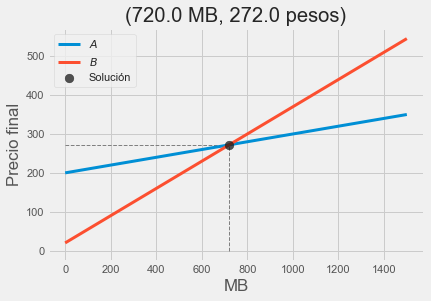

In [40]:
# Gráfica de las líneas de cada compañía
plt.plot(x, PA, lw=3,label = '$A$')
plt.plot(x, PB, lw=3,label = '$B$')

# Punto de cruce de las líneas rectas
plt.scatter(xsol[0], xsol[1], c='k', s = 75, alpha=0.75, zorder=5, label='Solución')

# Decoración de la gráfica
plt.xlabel('MB')
plt.ylabel('Precio final')
plt.title('({} MB, {} pesos)'.format(xsol[0][0], xsol[1][0]))
plt.vlines(xsol[0][0], 0, xsol[1][0], ls='--', lw=1.0, color='gray')
plt.hlines(xsol[1][0], 0, xsol[0][0], ls='--', lw=1.0, color='gray')

plt.grid(True)
plt.legend()
plt.show()

<a name='2'></a>
## Sistemas de ecuaciones lineales en general

El sistema lineal (2) se puede escribir como sigue:

$$
\begin{array}{ccc}
a_{00} x_0 + a_{01} x_1 & = &b_0 \\
a_{01} x_0 + a_{11} x_1 & = &b_1
\end{array} \Longrightarrow
\underbrace{
\left[
\begin{array}{cccc}
a_{00} & a_{01} \\
a_{01} & a_{11}
\end{array} \right]}_{\underline{\underline{A}}}
\underbrace{
\left[
\begin{array}{cccc}
x_{0} \\
x_{1} 
\end{array} \right]}_{\underline{{x}}}
=
\underbrace{
\left[
\begin{array}{c}
b_0 \\ b_1
\end{array}
\right]}_{\underline{{b}}}
$$

En general un sistema de ecuaciones lineales puede contener $n$ ecuaciones con $n$ incógnitas y se ve como sigue:

$$
\underline{\underline{A}} \cdot \underline{x} = \underline{b} \Longrightarrow
\left[
\begin{array}{ccccc}
a_{00} & a_{01} & a_{02} & \dots & a_{0n} \\
a_{10} & a_{11} & a_{12} & \dots & a_{1n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n1} & a_{n2} & \dots & a_{nn}
\end{array} \right] 
\left[
\begin{array}{cccc}
x_{0} \\ x_{1} \\ \vdots \\ x_{n}
\end{array} \right] 
=
\left[
\begin{array}{c}
b_0 \\ b_1 \\ \vdots \\ b_{n}
\end{array}
\right]
$$ 

<a name='3'></a>
## Transferencia de calor
Los sistemas de ecuaciones lineales aparecen en muchas aplicaciones. Por ejemplo, para estudiar la transferencia de calor en una placa cuadrada de metal, se puede resolver numéricamente una ecuación diferencial parcial (vea como aquí). La solución numérica se encuentra resolviendo un sistema lineal como el siguiente:

<center>
<img src="../../recursos/figuras/calor02.png"  width='500px'/>
</center>
    
Estos sistemas suelen ser muy grandes y para resolverlos se requiere de muchas operaciones, lo que implica también mucho tiempo de cómputo.

<a name='3-1'></a>
### Métodos estacionarios para solución de sistemas lineales.

Existen diferentes métodos de solución de los sistemas de ecuaciones lineales cada uno con ventajas y desventajas. En general se puede hablar de métodos estacionario (Jacobi, Gauss-Seidel, SOR, etc.) y métodos no estacionarios (GGM, BICGSTAB, GMRES, etc.). Véase el siguiente libro para revisar con mayor detalle la descripción de esos métodos.

<a name='ej-3'></a>
#### **<font color="SlateBlue">Ejercicio 3. Evaluación de métodos.</font>**
<font color="SlateBlue">El objetivo de este ejercicio es comparar algunos métodos estacionarios de solución de sistemas de ecuaciones lineales para resolver un problema de transferencia de calor.</font>
- <font color="Navy">En el siguiente interactivo seleccione un método y ejecute presionando `Run Interact`.</font> 
- <font color="Navy">Observe el comportamiento de cada método, tome nota del tiempo de CPU, el error y el número de iteraciones. Repita cambiando el tamaño de la malla `N`.</font>
- <font color="Navy">Posteriormente responda las preguntas en el *quiz* **Evaluación de los métodos: Jacobi, Gauss-Seidel, SOR** en Moodle.</font> 

In [42]:
%run "./zCondCalor_interactive.ipynb"

interactive(children=(Dropdown(description='Método', options=('Jacobi', 'Gauss-Seidel', 'SOR'), value='Jacobi'…